# Linearna regresia

### Generovanie dat

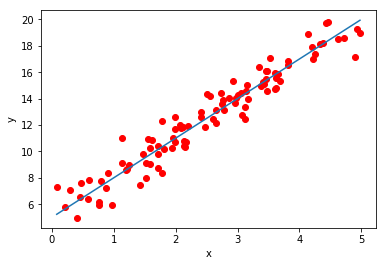

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

n = 100 # pocet dat
np.random.seed(123)
x = np.random.uniform(0 ,5 , n) # n dat z rovnomerneho rozdelenia (0,5)
x = np.sort(x) # zoradi
y_1 = 3*x + 5 + np.random.normal(0,1,n)
y_true_1 =  3*x + 5

plt.scatter(x, y_1, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y_true_1)
plt.show()

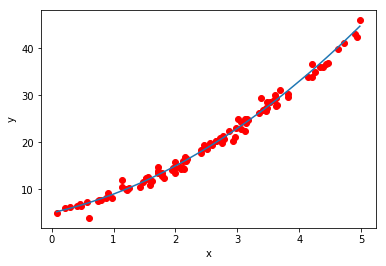

In [3]:
# TODO pre tie iste x, vygeneruj a zobraz funkciu x^2 + 3*x + 5

y_2 = x**2 + 3*x + 5 + np.random.normal(0,1,n)
y_true_2 = x**2 + 3*x + 5

plt.scatter(x, y_2, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y_true_2)
plt.show()

## Odhad koeficientov

In [4]:
# TODO vypocitaj LEAST SQUARES koeficienty a_hat a b_hat
a_hat = ((x - x.mean())*(y_1 - y_1.mean())).sum()/((x - x.mean())**2).sum()
b_hat = y_1.mean() - a_hat* x.mean()

print("a_hat = {}".format(a_hat))
print("b_hat = {}".format(b_hat))

a_hat = 2.9267402709222785
b_hat = 5.218712491509987


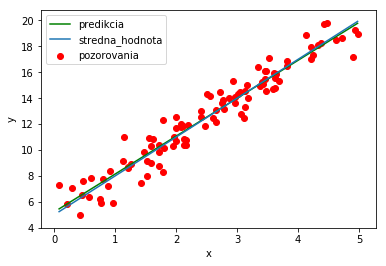

In [5]:
# TODO vyzualizuj fitovanu priamku

y_pred = a_hat*x + b_hat

plt.plot(x, y_pred, c ='g')
plt.plot(x, y_true_1)
plt.scatter(x, y_1, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['predikcia','stredna_hodnota', 'pozorovania'])
plt.show()


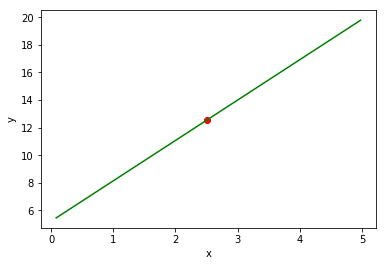

In [6]:
# TODO graficky ukaz, ze bod x_priemer a y_priemer lezi na predikovanej priamke

plt.plot(x, y_pred, c ='g')
plt.scatter(x.mean(), y_1.mean(), c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Homoskedasticita

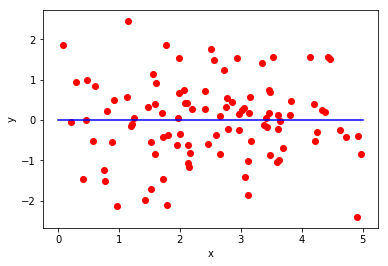

In [7]:
# TODO ukaz, ze chyby splnaju predpoklad homoskedasticity

res = y_1 - y_pred # residua

plt.scatter(x, res, c='r')
plt.plot([0,5],[0,0],c='b')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Kvalita fitu

In [8]:
# TODO vypocitaj residua, RSS, TSS a R^2

res = y_1 - y_pred # residua
RSS = (res**2).sum()
TSS = ((y_1 - y_1.mean())**2).sum()
R2 = 1-RSS/TSS

print("R^2 = {}".format(R2))

R^2 = 0.9311470355568691


## Outlieri

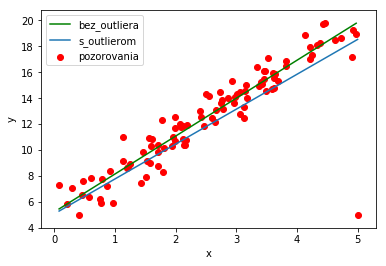

In [9]:
x_outlier = np.append(x, 5)
y_1_outlier = np.append(y_1, 5)

# TODO graficky ukaz, ze fitovana priamka sa vyrazne zmenila
a_hat_2 = ((x_outlier - x_outlier.mean())*(y_1_outlier - y_1_outlier.mean())).sum()/((x_outlier - x_outlier.mean())**2).sum()
b_hat_2 = y_1_outlier.mean() - a_hat* x_outlier.mean()

y_1_outlier_pred = a_hat_2*x_outlier + b_hat_2


plt.plot(x, y_pred, c ='g')
plt.plot(x_outlier, y_1_outlier_pred)
plt.scatter(x_outlier, y_1_outlier, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['bez_outliera','s_outlierom', 'pozorovania'])
plt.show()


# Signifikantnost

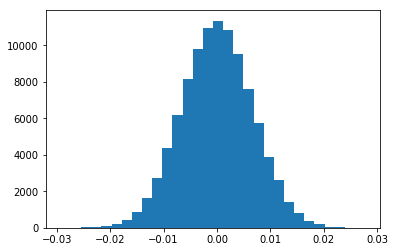

a_hat = 2.9267402709222785


In [10]:
# TODO z obrazka urci, ci je a_hat signifikantne

plt.hist(np.random.normal(0,1/(x**2-x.mean()**2).sum(),100000), bins = 30)
plt.show()
print("a_hat = {}".format(a_hat))

## PCA

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[[-0.30505853 -0.9523336 ]]


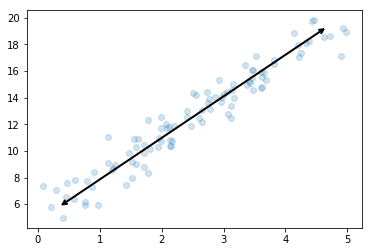

In [12]:
from sklearn.decomposition import PCA
data = np.array([x,y_1]).T
pca = PCA(n_components=1)
pca.fit(data)
plt.scatter(data[:, 0], data[:, 1], alpha=0.2)
draw_vector(pca.mean_, pca.mean_ - 7*pca.components_[0])
draw_vector(pca.mean_, pca.mean_ + 7*pca.components_[0])
print(pca.components_)